In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.datasets import make_blobs
import random
import json
import time
from tabulate import tabulate

from kdtree import *
from helper import *

In [3]:
savefile = "mst_data2.json"
to_plot = True
no_points = 15
no_centres = 10

In [4]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=no_points, centers=no_centres, random_state=42)
points = [(x, y) for x, y in X]

In [5]:
cordmap = {point: i for i, point in enumerate(points)}

In [6]:
def dcran(cordmap):
    tree = KDTree()
    tree.root = tree.build(points)
    G = nx.Graph()
    for coord, index in cordmap.items():
        G.add_node(index, pos=coord)

    k = 2
    connected_components = 1
    while True:
        graphify(G, to_plot)
        maxdis = min(len(cordmap) , k**k)
        for pointi, i in cordmap.items():
            pointj = ith_nearest_neighbor(tree, pointi, k)
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, cordmap[pointj], weight=dis)
        graphify(G, to_plot)
            # print(k ,  i , cordmap[pointj] , dis )
            # randis = random.randint(k + 1, maxdis)
        for pointi, i in cordmap.items():
            randis = maxdis
            # randis = (cusrandis(k + 1 , maxdis))
            # print(randis , k)
            pointj = ith_nearest_neighbor(tree, pointi, randis)
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, cordmap[pointj], weight=dis)
            # print(k ,  i , cordmap[pointj] , dis , randis)
        
        graphify(G, to_plot)
        ccount = count_clusters(G)
        print(k, ccount)
        k += 1
        
        if ccount == 1:
            break
        
    return G

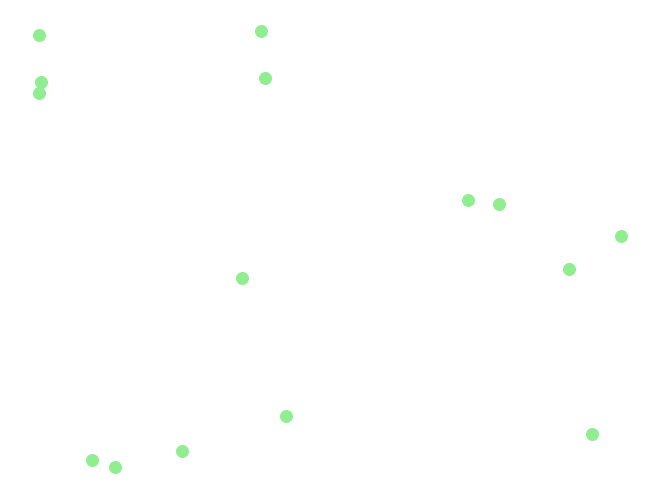

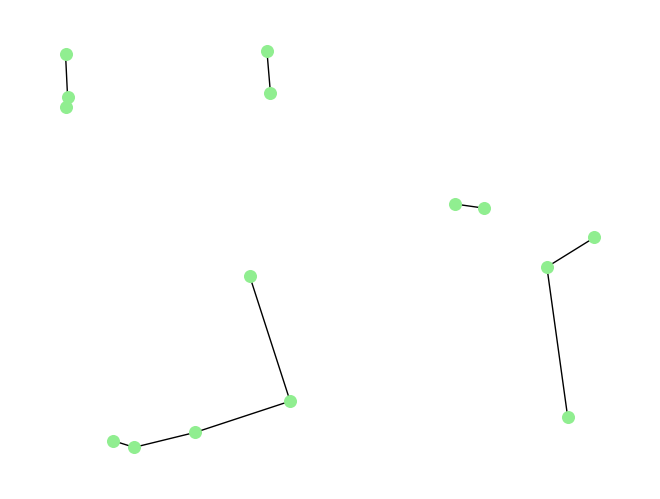

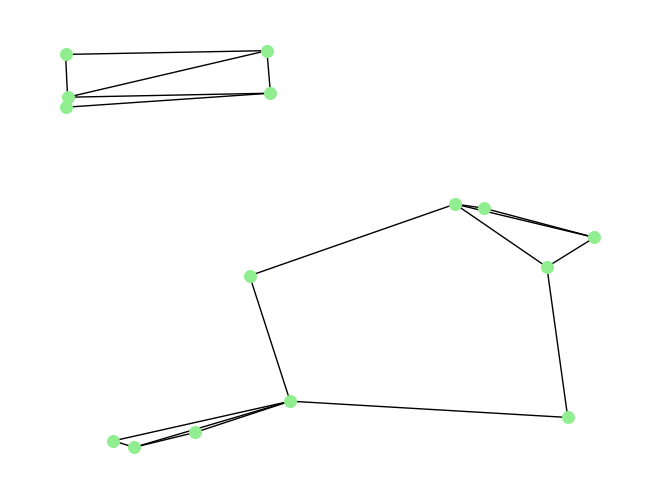

2 2


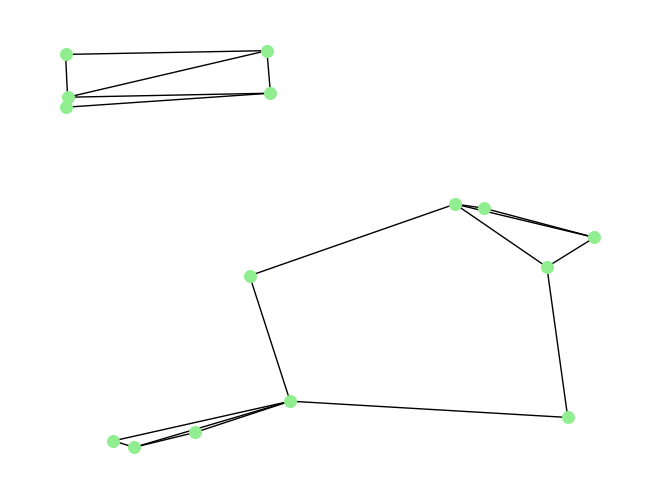

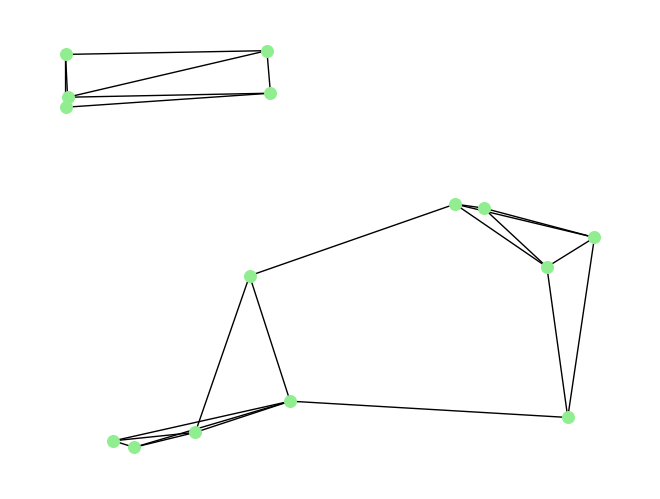

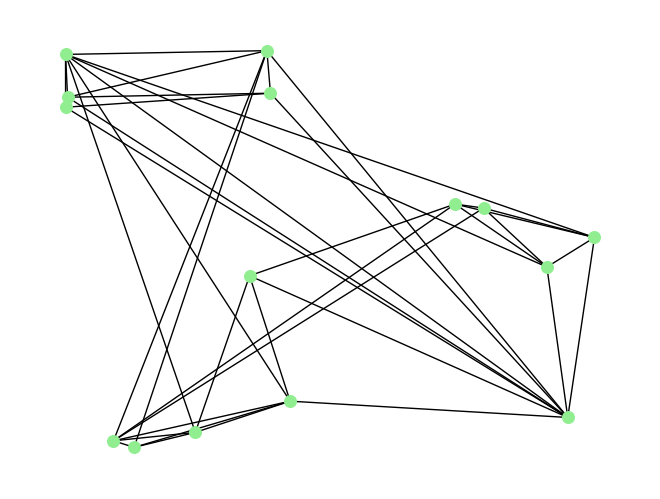

3 1


In [7]:
dcran_start_time = time.time()
kc = dcran(cordmap)

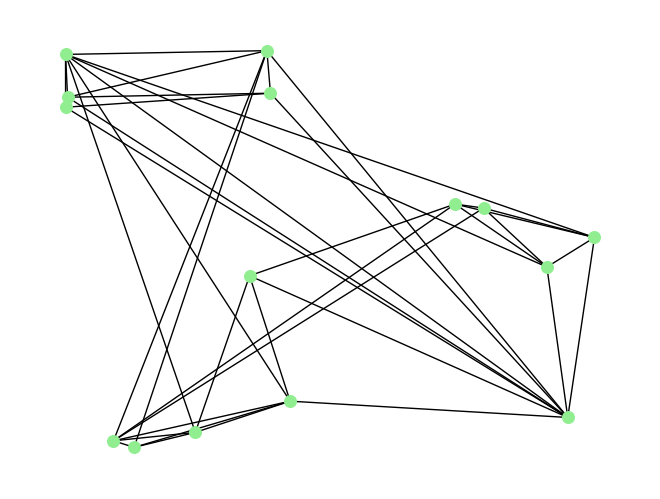

In [8]:
graphify(kc, to_plot)

In [9]:
G = kc
num_nodes = G.number_of_nodes()
conedge = num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")

Total number of nodes: 15
Total number of edges: 40
Total sum of edge weights: 336.3616362031971


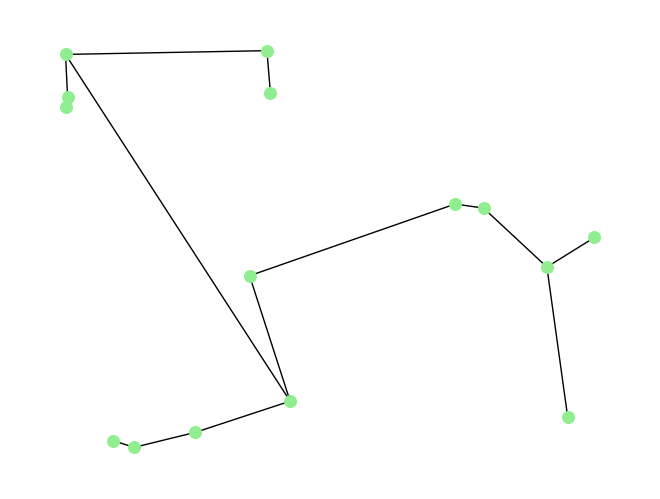

In [10]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot)



In [11]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


foundw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
dcran_end_time = time.time()
dcran_elapsed_time = dcran_end_time - dcran_start_time

Total number of nodes: 15
Total number of edges: 14
Total sum of edge weights: 54.753334887643916


In [12]:
stmst_start_time = time.time()
G = nx.Graph()

for pointi, i in cordmap.items():
    G.add_node(i, pos=pointi)
    for pointj, j in cordmap.items():
        if i != j:
            dis = euclidean_distance(pointi, pointj)
            G.add_edge(i, j, weight=dis)

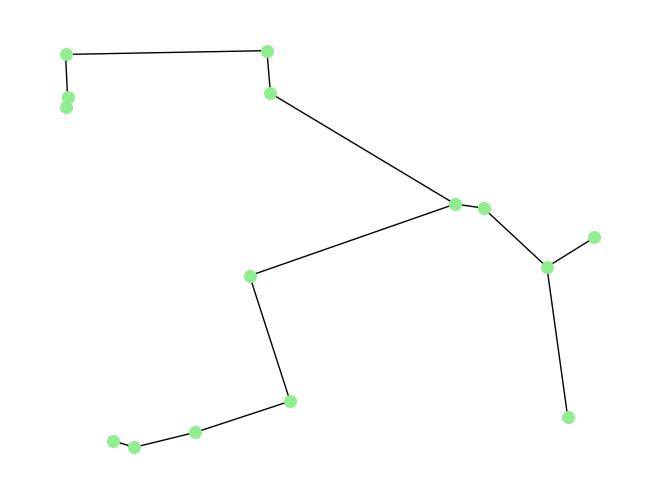

In [13]:
mst = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight")
graphify(mst, to_plot)

In [14]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
realw = total_weight = sum(data["weight"] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")
stmst_end_time = time.time()
stmst_elapsed_time = stmst_end_time - stmst_start_time

Total number of nodes: 15
Total number of edges: 14
Total sum of edge weights: 46.25924116198592


In [15]:
percentage_error = ((foundw - realw) / realw) * 100

# Format the output for readability
formatted_output = f"Real Weight: {realw}  Found Weight: {foundw}  no of Edge: {conedge} Percentage Error: {percentage_error:.2f}%"
formatted_output

'Real Weight: 46.25924116198592  Found Weight: 54.753334887643916  no of Edge: 40 Percentage Error: 18.36%'

In [16]:
with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)
currres = []
speedup = round((stmst_elapsed_time  / dcran_elapsed_time) , 2)
loaded_data.append(
    [
        no_points,
        no_centres,
        foundw,
        realw,
        conedge,
        100 - percentage_error ,
        dcran_elapsed_time ,
        stmst_elapsed_time ,
        speedup
    ]
)

# Save the updated dictionary back to the JSON file
with open(savefile, "w") as f:
    json.dump(loaded_data, f)

[[1000, 10, 262.4419314705513, 258.819134723451, 8252, 98.6, 1.83, 4.38, 2.4], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.921, 28.58, 551.35, 19.29], [10000, 100, 1342.6324139702915, 1337.4478711909765, 27591, 99.612, 3.24, 510.53, 157.39], [10000, 100, 1342.6324139702915, 1337.4478711909762, 27591, 99.612, 2.48, 632.89, 255.22], [10000, 1000, 1459.7289235192638, 1455.1233116849917, 27457, 99.683, 2.5, 565.44, 226.17], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.179672241210938, 617.7955191135406, 25.55], [10000, 50, 1260.1226131964793, 1255.8337705131123, 27661, 99.65848643474409, 2.1823902130126953, 513.3643357753754, 235.23], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.11609435081482, 543.8352909088135, 22.55], [10000, 10, 875.7172119877604, 865.3329904388614, 38587, 98.79997392175785, 16.157432556152344, 646.0387144088745, 39.98], [10000, 100, 1342.6324139702872, 1337.4478711909717, 27591, 99.612

In [17]:
with open(savefile, "r") as f:
    loaded_data = json.load(f)
print(loaded_data)

[[1000, 10, 262.4419314705513, 258.819134723451, 8252, 98.6, 1.83, 4.38, 2.4], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.921, 28.58, 551.35, 19.29], [10000, 100, 1342.6324139702915, 1337.4478711909765, 27591, 99.612, 3.24, 510.53, 157.39], [10000, 100, 1342.6324139702915, 1337.4478711909762, 27591, 99.612, 2.48, 632.89, 255.22], [10000, 1000, 1459.7289235192638, 1455.1233116849917, 27457, 99.683, 2.5, 565.44, 226.17], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.179672241210938, 617.7955191135406, 25.55], [10000, 50, 1260.1226131964793, 1255.8337705131123, 27661, 99.65848643474409, 2.1823902130126953, 513.3643357753754, 235.23], [10000, 10, 866.0209239473647, 865.3329904388614, 90645, 99.92050071867081, 24.11609435081482, 543.8352909088135, 22.55], [10000, 10, 875.7172119877604, 865.3329904388614, 38587, 98.79997392175785, 16.157432556152344, 646.0387144088745, 39.98], [10000, 100, 1342.6324139702872, 1337.4478711909717, 27591, 99.612

In [18]:
headers = [
    "Points",
    "Centres",
    "DCRAN Wt",
    "kruskal Wt",
    "Edge count",
    "Acc(%)",
    "DCRAN Time (s)",
    "STMST Time (s)",
    "Speedup"
]

# Format the data as a table using tabulate
table_str = tabulate(loaded_data, headers, tablefmt="pipe", floatfmt=(".0f", ".0f", ".1f", ".1f", ".0f", ".2f", ".2f", ".2f", ".2f"))
print(table_str)




|   Points |   Centres |   DCRAN Wt |   kruskal Wt |   Edge count |   Acc(%) |   DCRAN Time (s) |   STMST Time (s) |   Speedup |
|---------:|----------:|-----------:|-------------:|-------------:|---------:|-----------------:|-----------------:|----------:|
|     1000 |        10 |      262.4 |        258.8 |         8252 |    98.60 |             1.83 |             4.38 |      2.40 |
|    10000 |        10 |      866.0 |        865.3 |        90645 |    99.92 |            28.58 |           551.35 |     19.29 |
|    10000 |       100 |     1342.6 |       1337.4 |        27591 |    99.61 |             3.24 |           510.53 |    157.39 |
|    10000 |       100 |     1342.6 |       1337.4 |        27591 |    99.61 |             2.48 |           632.89 |    255.22 |
|    10000 |      1000 |     1459.7 |       1455.1 |        27457 |    99.68 |             2.50 |           565.44 |    226.17 |
|    10000 |        10 |      866.0 |        865.3 |        90645 |    99.92 |            24.18 |

In [19]:
print("Line 1\nLine 2")


Line 1
Line 2
